## Simple Processing

An example to proessing images without a proper pipeline

In [21]:
%load_ext autoreload
%autoreload 2
from paidiverpy.open_layer import OpenLayer
from paidiverpy.sampling_layer import SamplingLayer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Open the images

The first step will be always the load images step

In [22]:
# Instantiate the class
open_layer = OpenLayer(config_file_path="../config_files/config_simple.yml")

In [23]:
# See the configuration file
open_layer.config

{
    "general": {
        "name": "raw",
        "step_name": "open",
        "sample_data": "benthic_csv",
        "input_path": "/home/tobfer/.paidiverpy_cache/benthic_csv/images",
        "output_path": "output",
        "metadata_path": "/home/tobfer/.paidiverpy_cache/benthic_csv/metadata/metadata_benthic_csv.csv",
        "metadata_type": "CSV_FILE",
        "image_open_args": "PNG",
        "append_data_to_metadata": "/home/tobfer/.paidiverpy_cache/benthic_csv/metadata/appended_metadata_benthic_csv.csv",
        "n_jobs": 1,
        "track_changes": true,
        "rename": "datetime",
        "sampling": [
            {
                "name": "sampling",
                "step_name": "sampling",
                "test": false,
                "params": {
                    "value": 0.1,
                    "raise_error": false
                },
                "mode": "percent"
            }
        ],
        "convert": [
            {
                "name": "convert",
                "step_name": "convert",
                "test": false,
                "params": {
                    "to": "gray",
                    "channel_selector": 0,
                    "raise_error": false
                },
                "mode": "to"
            }
        ]
    },
    "steps": []
}

In [24]:
# Run the open layer process. It will open the images from the input path, and save then as a ImagesLayer
open_layer.run()


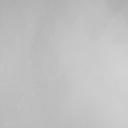
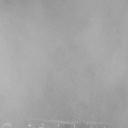
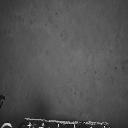
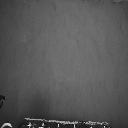
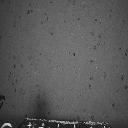

In [25]:
# See the images output
open_layer.images

In [26]:
open_layer.get_metadata()

,ID,XResolution,YResolution,ExposureTime,FNumber,ISO,image-datetime,MaxApertureValue,WhiteBalance,FocusPosition,...,temperature_c,positioning_ok,attitude_ok,depth_ok,altitude_ok,X,phototime,flag,point,filename
0,443,300,300,0.016667,8,200,2018-06-11 04:16:31,2.828427,FLASH,17,...,1.4456,1,1,1,1,NaN,2018-06-11 04:16:31,0,POINT (-153.60532064 11.2516466),2018-06-11T04:16:31
1,449,300,300,0.016667,8,200,2018-06-11 04:17:31,2.828427,FLASH,17,...,1.4478,1,1,1,1,NaN,2018-06-11 04:17:31,0,POINT (-153.60531831 11.25162916),2018-06-11T04:17:31
2,460,300,300,0.016667,8,200,2018-06-11 04:19:21,2.828427,FLASH,17,...,1.4549,1,1,1,1,NaN,2018-06-11 04:19:21,0,POINT (-153.60524786 11.25163778),2018-06-11T04:19:21
3,463,300,300,0.016667,8,200,2018-06-11 04:19:51,2.828427,FLASH,17,...,1.4427,1,1,1,1,NaN,2018-06-11 04:19:51,0,POINT (-153.60522104 11.25162529),2018-06-11T04:19:51
4,473,300,300,0.016667,8,200,2018-06-11 04:21:31,2.828427,FLASH,17,...,1.4378,1,1,1,1,NaN,2018-06-11 04:21:31,0,POINT (-153.60514236 11.25164693),2018-06-11T04:21:31



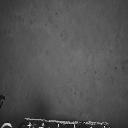

In [27]:
# See a particular image
open_layer.images.show(image_number=2)

In [28]:
# See the first 5 lines of the metadata
open_layer.get_metadata().head(5)

,ID,XResolution,YResolution,ExposureTime,FNumber,ISO,image-datetime,MaxApertureValue,WhiteBalance,FocusPosition,...,temperature_c,positioning_ok,attitude_ok,depth_ok,altitude_ok,X,phototime,flag,point,filename
0,443,300,300,0.016667,8,200,2018-06-11 04:16:31,2.828427,FLASH,17,...,1.4456,1,1,1,1,NaN,2018-06-11 04:16:31,0,POINT (-153.60532064 11.2516466),2018-06-11T04:16:31
1,449,300,300,0.016667,8,200,2018-06-11 04:17:31,2.828427,FLASH,17,...,1.4478,1,1,1,1,NaN,2018-06-11 04:17:31,0,POINT (-153.60531831 11.25162916),2018-06-11T04:17:31
2,460,300,300,0.016667,8,200,2018-06-11 04:19:21,2.828427,FLASH,17,...,1.4549,1,1,1,1,NaN,2018-06-11 04:19:21,0,POINT (-153.60524786 11.25163778),2018-06-11T04:19:21
3,463,300,300,0.016667,8,200,2018-06-11 04:19:51,2.828427,FLASH,17,...,1.4427,1,1,1,1,NaN,2018-06-11 04:19:51,0,POINT (-153.60522104 11.25162529),2018-06-11T04:19:51
4,473,300,300,0.016667,8,200,2018-06-11 04:21:31,2.828427,FLASH,17,...,1.4378,1,1,1,1,NaN,2018-06-11 04:21:31,0,POINT (-153.60514236 11.25164693),2018-06-11T04:21:31


### Resample the images

The add a next step to your processing pipeline, you need to instantiate the SamplingLayer class and pass the OpenLayer class as an argument

In [29]:
# Set the parameters
parameters = {
    "name": "datetime",
    "mode": "datetime",
    "params": {"min": "2018-06-11 04:14:00", "max": "2018-06-11 04:20:00"},
}

In [30]:
# Instantiate the new class
resample = SamplingLayer(paidiverpy=open_layer, parameters=parameters)

In [31]:
# Run the process using the parameters provided
resample.run()

☁ paidiverpy ☁  |       INFO | 2025-09-11 16:55:38 | Number of images before the sampling step: 5. Total number of images after: 4


INFO:paidiverpy:Number of images before the sampling step: 5. Total number of images after: 4



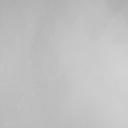
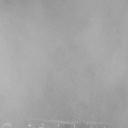
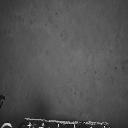
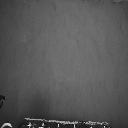
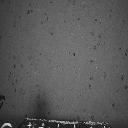
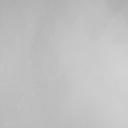
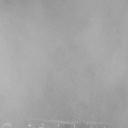
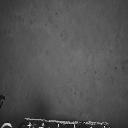
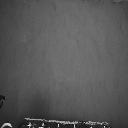

In [32]:
# See the output images
resample.images